<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%2010_Object%20detection%20%EC%9D%91%EC%9A%A9%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20%EA%B0%9C%EB%B0%9C%ED%95%98%EA%B8%B0/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Colab Notebooks/models

/content/gdrive/My Drive/Colab Notebooks/models


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print (train_images.shape) # 1 class당 대략 6000장 존재

(60000, 28, 28)


In [0]:
print (len(train_labels))

60000


In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

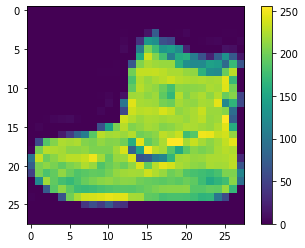

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0 # 정규화
test_images = test_images / 255.0 # 정규화

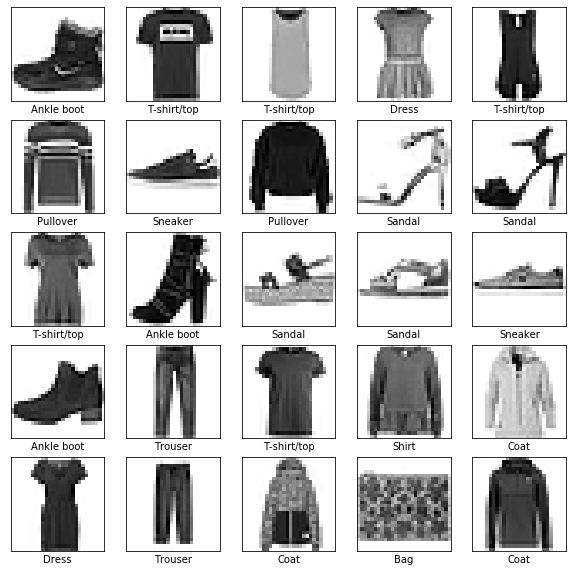

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 실습

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model



# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(1024, kernel_initializer='he_normal', use_bias=False),
#     keras.layers.BatchNormalization(),
#     keras.layers.Activation('relu'),
#     keras.layers.Dense(1024, kernel_initializer='he_normal', use_bias=False),
#     keras.layers.BatchNormalization(),
#     keras.layers.Activation('relu'),
#     keras.layers.Dense(1024, kernel_initializer='he_normal', use_bias=False),
#     keras.layers.BatchNormalization(),
#     keras.layers.Activation('relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])


input_img = Input(shape=(28,28,1))
# batch, 28, 28, 1
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid')(input_img)
# batch, 26, 26, 32
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid')(x)
# batch, 24, 24, 32
x = MaxPooling2D((2, 2), padding='same')(x)
# batch, 12, 12, 32
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid')(x)
# batch, 10, 10, 32
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid')(x)
# batch, 8, 8, 32
x = MaxPooling2D((2, 2), padding='same')(x)
# batch, 4, 4, 32
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid')(x)
# batch, 2, 2, 32
x = Flatten()(x)
# batch, 128
x = Dense(64, activation='relu', kernel_initializer='he_normal')(x)
# batch, 64
output_img = Dense(10, activation='softmax')(x)
# batch, 10

model = Model(input_img, output_img)

In [0]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0   

In [0]:
# categorical_crossentropy : train_labels를 one-hot encoding 하고 학습 및 예측([0,1,0],[1,0,0],[1,0,0],...)
# sparse_categorical_crossentropy : train_labels를 one-hot encoding 하지 않고 변환하고 학습 및 예측(1,0,0,...)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 10개 중에 1개만 맞추는 문제의 loss function
              metrics=['accuracy'])

In [0]:
# monitor : loss, accuracy, val loss, val accuracy

filepath = "./saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')

In [0]:
train_images = np.expand_dims(train_images, axis=-1)

In [0]:
model.fit(train_images, train_labels, validation_split=0.2,
            epochs=5,
            shuffle=True, callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 21s 431us/step - loss: 0.5378 - acc: 0.8071 - val_loss: 0.3971 - val_acc: 0.8558

Epoch 00001: saving model to ./saved-model-01-0.40.hdf5
Epoch 2/5
48000/48000 [==============================] - 17s 344us/step - loss: 0.3424 - acc: 0.8776 - val_loss: 0.3209 - val_acc: 0.8848

Epoch 00002: saving model to ./saved-model-02-0.32.hdf5
Epoch 3/5
48000/48000 [==============================] - 16s 335us/step - loss: 0.2883 - acc: 0.8945 - val_loss: 0.2986 - val_acc: 0.8895

Epoch 00003: saving model to ./saved-model-03-0.30.hdf5
Epoch 4/5
48000/48000 [==============================] - 16s 335us/step - loss: 0.2572 - acc: 0.9065 - val_loss: 0.2874 - val_acc: 0.8953

Epoch 00004: saving model to ./saved-model-04-0.29.hdf5
Epoch 5/5
48000/48000 [==============================] - 16s 336us/step - loss: 0.2343 - acc: 0.9132 - val_loss: 0.2646 - val_acc: 0.9048

Epoch 00005: saving model to ./

In [0]:
test_images = np.expand_dims(test_images, axis=-1)

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.9029


Make Prediction

In [0]:
predictions = model.predict(test_images)

In [0]:
print (predictions[0])

[1.6575233e-07 8.8925010e-09 6.2656365e-09 1.2328996e-09 8.6471301e-09
 1.7198850e-03 2.5931200e-07 3.0939369e-02 3.0299884e-07 9.6733999e-01]


In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

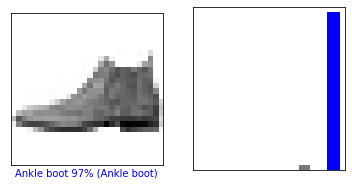

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

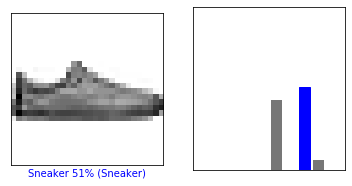

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

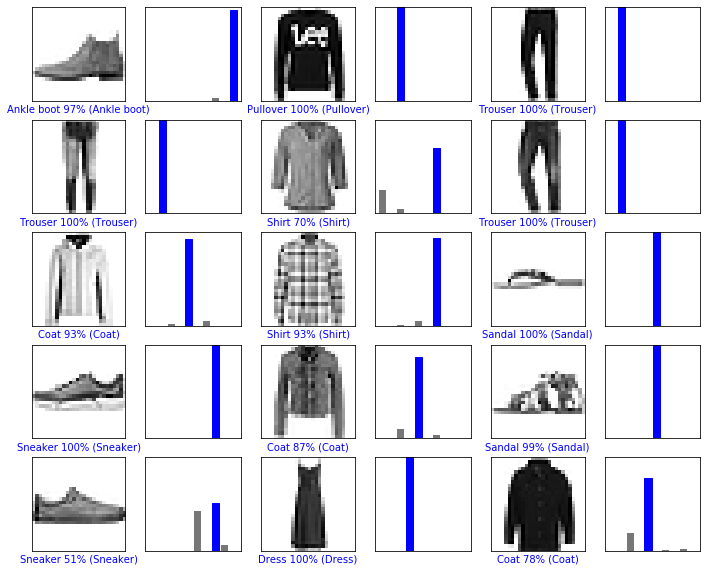

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()